In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tqdm import tqdm
from random import shuffle
import sklearn.model_selection 
import cv2

In [71]:
df=pd.read_csv("/content/drive/MyDrive/Urbansound8k/UrbanSound8K.csv")

In [72]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [73]:
df.isnull().sum()


slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [74]:
sounds=df.groupby("classID")["class"].unique()
sounds

classID
0     [air_conditioner]
1            [car_horn]
2    [children_playing]
3            [dog_bark]
4            [drilling]
5       [engine_idling]
6            [gun_shot]
7          [jackhammer]
8               [siren]
9        [street_music]
Name: class, dtype: object

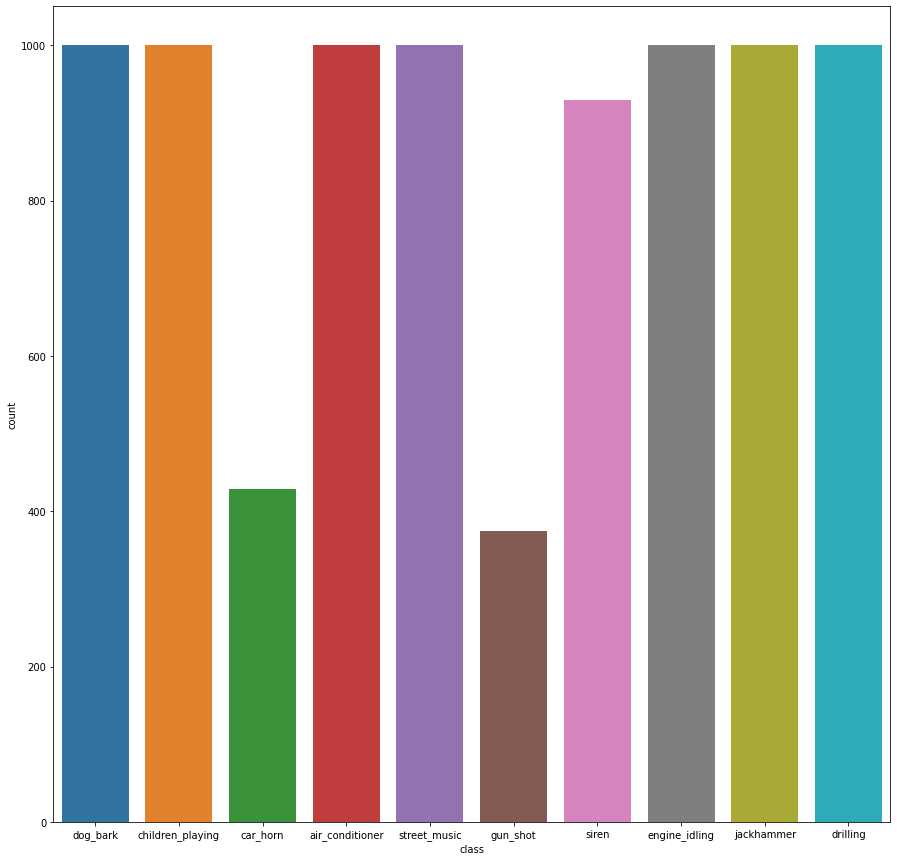

In [76]:
plt.figure(figsize=(15,15))
sns.countplot(x=df["class"],data=df)
plt.show()

In [75]:
#categori=["air_conditioner","car_horn","children_playing","dog_bark","drilling","engine_idling","gun_shot","jackhammer","siren","street_music"]
boyut=128
veri=[]
categori=["0","1","2","3","4","5","6","7","8","9"]
DIR="/content/drive/MyDrive/Urbansound8k/spectrograms adlı dosyanın kopyası"
for kategori in categori:
  klasor_adresi = os.path.join(DIR,kategori)
  deger = categori.index(kategori)
  for resim_adi in tqdm(os.listdir(klasor_adresi)):
    resim_adresi = os.path.join(klasor_adresi,resim_adi)
    resim = cv2.imread(resim_adresi, cv2.IMREAD_GRAYSCALE)
    if(resim is None):#resimlerden none değer resimler olduğundan bu resimlere denk geldiğinde hata yazdır.
      print("Hata")
    else:
      #resimler tekrardan boyutlandırılır.
      resim = cv2.resize(resim,(boyut,boyut))
      #resimler normalize edilir.
      resim=resim.astype(np.float32)/255
      #resimleri okuyup veri adında boş bir listeye eklenir.
      veri.append([resim,deger])
      



100%|██████████| 1000/1000 [00:09<00:00, 105.21it/s]


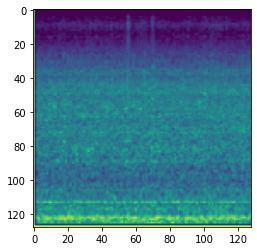

In [77]:
plt.imshow(veri[1][0])


In [78]:
import random
random.shuffle(veri)
X=[]#spektogramlar
Y=[]#"0":air_conditioner vs

for x,y in veri:
  X.append(x)
  Y.append(y)

2


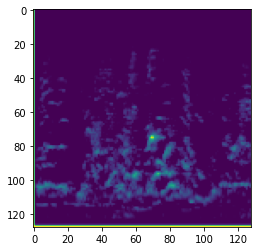

In [79]:
plt.imshow(X[45])
print(Y[45])

In [80]:
import numpy

X = numpy.array(X).reshape(-1,boyut,boyut,1)


In [81]:
X=np.array(X)
Y=np.array(Y)
X_train, X_test, y_train, y_test=sklearn.model_selection.train_test_split(X,Y,test_size=0.2, shuffle=True, random_state=8)
X_train, X_val, y_train, y_val= sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=8)

In [82]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train)
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (5238, 128, 128, 1)
y_train shape:  [8 1 9 ... 5 4 9]
X_val shape:  (1747, 128, 128, 1)
y_val shape:  (1747,)
X_test shape:  (1747, 128, 128, 1)
y_test shape:  (1747,)


In [83]:
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Conv2D, Activation, BatchNormalization, Flatten, Dense, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [84]:
from tensorflow import keras
def model1():
  model = Sequential()
  model.add(Conv2D(filters=64,kernel_size=(3,3), input_shape=X[0].shape, activation='relu',padding="same"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding="same"))
  model.add(MaxPool2D(pool_size=(2,2)))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(keras.layers.Dropout(0.5))
  model.add(Dense(1,activation='softmax'))
  model.compile( Adam(learning_rate=1e-4),loss='categorical_crossentropy',  metrics=['accuracy'])
  return model

model=model1()  
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 32, 32, 128)      512       
 hNormalization)                                                 
                                                     

In [85]:
mc=ModelCheckpoint("en_iyi_model.h5", save_best_only=True, monitor="val_loss",mode="min")
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), batch_size = 32, verbose = 1, shuffle = 1,callbacks=[mc])

Epoch 1/10
164/164 [==============================] - 279s 2s/step - loss: 0.0000e+00 - accuracy: 0.0502 - val_loss: 0.0000e+00 - val_accuracy: 0.0492
Epoch 2/10
164/164 [==============================] - 278s 2s/step - loss: 0.0000e+00 - accuracy: 0.0502 - val_loss: 0.0000e+00 - val_accuracy: 0.0492
Epoch 3/10
164/164 [==============================] - 279s 2s/step - loss: 0.0000e+00 - accuracy: 0.0502 - val_loss: 0.0000e+00 - val_accuracy: 0.0492
Epoch 4/10
164/164 [==============================] - 278s 2s/step - loss: 0.0000e+00 - accuracy: 0.0502 - val_loss: 0.0000e+00 - val_accuracy: 0.0492
Epoch 5/10
164/164 [==============================] - 292s 2s/step - loss: 0.0000e+00 - accuracy: 0.0502 - val_loss: 0.0000e+00 - val_accuracy: 0.0492
Epoch 6/10
164/164 [==============================] - 275s 2s/step - loss: 0.0000e+00 - accuracy: 0.0502 - val_loss: 0.0000e+00 - val_accuracy: 0.0492
Epoch 7/10
164/164 [==============================] - 273s 2s/step - loss: 0.0000e+00 - accura

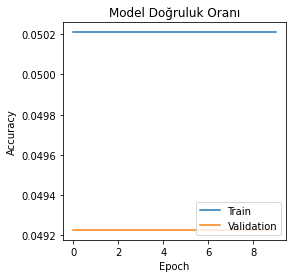

0.04922724515199661


<Figure size 432x288 with 0 Axes>

In [86]:
#val_accuracy ve accuracy değerleri grafikte gösterilmiştir.
plt.figure(figsize=(4,4))
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Doğruluk Oranı')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='lower right')
plt.show()
plt.savefig('urbansound.png',dpi=300)
print(max(model.history.history['val_accuracy']))

In [87]:
model.save("en_iyi_model.h5")

In [88]:
from tensorflow.keras.models import load_model
yuklenen_model = load_model('en_iyi_model.h5')

In [90]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y,yuklenen_model.predict(X).round()))
print(classification_report(Y,yuklenen_model.predict(X).round()))

[[   0 1000    0    0    0    0    0    0    0    0]
 [   0  429    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0  374    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]
 [   0  929    0    0    0    0    0    0    0    0]
 [   0 1000    0    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.05      1.00      0.09       429
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00       374
           7       0.00      0.00   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[1.]


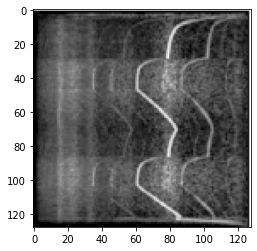

In [91]:
import numpy
print(yuklenen_model.predict(X)[1])
plt.imshow(numpy.column_stack(X[1]),cmap='gray')